In [1]:
import tensorflow as tf
print("GPU Available:", tf.config.list_physical_devices('GPU'))



GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
!pip install tensorflow matplotlib numpy

In [4]:
import zipfile, os

# STEP 1: Rename if it's still archive.zip
if "archive.zip" in os.listdir():
    os.rename("archive.zip", "brain_tumor_dataset.zip")

# STEP 2: Extract
with zipfile.ZipFile("brain_tumor_dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()  # Extracts to current folder


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [7]:
# Import all required libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Image parameters
image_size = 150
batch_size = 32

# Create data generator with augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 80% training, 20% validation
)

# ✅ Corrected path: your 'yes' and 'no' folders are in root
train_gen = datagen.flow_from_directory(
    "./",  # This is root folder where 'yes' and 'no' are
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    "./",
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)


Found 406 images belonging to 6 classes.
Found 100 images belonging to 6 classes.


In [8]:
import shutil, os

# Make a clean folder
os.makedirs("brain_tumor_data_clean", exist_ok=True)

# Move only yes and no folders
shutil.move("yes", "brain_tumor_data_clean/yes")
shutil.move("no", "brain_tumor_data_clean/no")


'brain_tumor_data_clean/no'

In [9]:
image_size = 150
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    "brain_tumor_data_clean",  # ✅ now pointing to clean folder
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    "brain_tumor_data_clean",
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)


Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [10]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary


SyntaxError: incomplete input (ipython-input-10-992706716.py, line 15)

In [11]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification (yes/no)
])  # ✅ Closing bracket here

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True)

# Train the model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=15,
    callbacks=[early_stop, checkpoint]
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 528ms/step - accuracy: 0.6569 - loss: 0.6684

7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 972ms/step - accuracy: 0.6524 - loss: 0.6698 - val_accuracy: 0.7000 - val_loss: 0.6814
Epoch 2/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - accuracy: 0.6790 - loss: 0.6540

7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 440ms/step - accuracy: 0.6760 - loss: 0.6494 - val_accuracy: 0.7800 - val_loss: 0.5339
Epoch 3/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - accuracy: 0.6275 - loss: 0.6654

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 300ms/step - accuracy: 0.6322 - loss: 0.6569 - val_accuracy: 0.7200 - val_loss: 0.5257
Epoch 4/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 244ms/step - accuracy: 0.6645 - loss: 0.6209 - val_accuracy: 0.7400 - val_loss: 0.5827
Epoch 5/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 244ms/step - accuracy: 0.6666 - loss: 0.5821 - val_accuracy: 0.7000 - val_loss: 0.5613
Epoch 6/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 249ms/step - accuracy: 0.7342 - loss: 0.5855 - val_accuracy: 0.7600 - val_loss: 0.5416


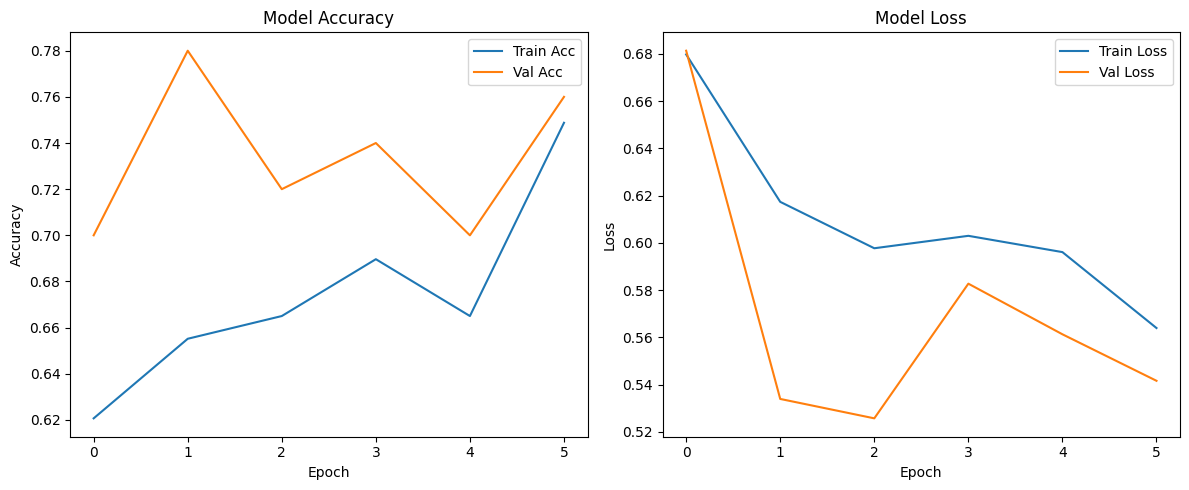

In [12]:
# Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [15]:
import urllib.request

# ✅ This link is a valid raw image (tumor MRI)
url = "https://raw.githubusercontent.com/smaranjitghose/Deep-Classifier/main/assets/demo/yes1.jpg"
urllib.request.urlretrieve(url, "test_mri.jpg")

print("✅ MRI image successfully downloaded as test_mri.jpg")


HTTPError: HTTP Error 404: Not Found

In [16]:
import os
print("test_mri.jpg" in os.listdir())


False


In [17]:
import os
print("test_mri.jpg" in os.listdir())


False


In [18]:
import os

# Show all files in current directory
print("Current Files in Directory:")
print(os.listdir())


Current Files in Directory:
['.config', 'brain_tumor_data_clean', 'archive.zip', '.ipynb_checkpoints', 'test_mri..jpg', 'best_model.h5', 'brain_tumor_dataset', 'sample_data']


In [19]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("best_model.h5")

# Load and preprocess the test image
img_path = "test_mri.jpg"
img = cv2.imread(img_path)
img_resized = cv2.resize(img, (image_size, image_size))
img_array = np.expand_dims(img_resized / 255.0, axis=0)

# Make prediction
pred = model.predict(img_array)[0][0]
label = "Tumor" if pred > 0.5 else "No Tumor"
print(f"Prediction: {label} ({pred:.2f})")

# Grad-CAM generation
grad_model = tf.keras.models.Model(
    [model.inputs], [model.get_layer(index=-3).output, model.output]
)
with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(img_array)
    loss = predictions[:, 0]

grads = tape.gradient(loss, conv_outputs)[0]
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
conv_outputs = conv_outputs[0]
heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
heatmap = tf.squeeze(heatmap)
heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
heatmap = cv2.resize(heatmap.numpy(), (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heat


error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [20]:
import cv2

img = cv2.imread("test_mri.jpg")
print(img is None)


True


In [21]:
import os

# List full file details
for file in os.listdir():
    print(f"→ {file}")


→ .config
→ brain_tumor_data_clean
→ archive.zip
→ .ipynb_checkpoints
→ test_mri..jpg
→ best_model.h5
→ brain_tumor_dataset
→ sample_data


In [22]:
# Rename any misnamed MRI file
for file in os.listdir():
    if file.lower().startswith("y") and file.lower().endswith((".jpg", ".jpeg")):
        os.rename(file, "test_mri.jpg")
        print(f"✅ Renamed {file} to test_mri.jpg")
    elif "test_mri" in file.lower() and not file.lower().endswith(".jpg"):
        os.rename(file, "test_mri.jpg")
        print(f"✅ Fixed extension: {file} → test_mri.jpg")


In [23]:
import cv2

img = cv2.imread("test_mri.jpg")
if img is None:
    print("❌ Still not loading — image corrupted or not found.")
else:
    print("✅ Image loaded successfully:", img.shape)


❌ Still not loading — image corrupted or not found.
